In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams
from sklearn.metrics import confusion_matrix
import cv2

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K


%matplotlib inline

sns.set(style='white', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 8

np.random.seed(42)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

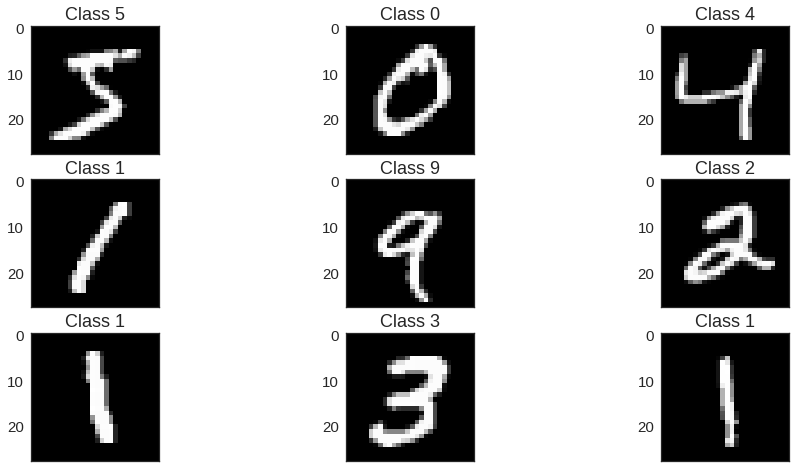

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.title("Class {}".format(y_train[i]))

# What Neural Nets see?

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
digit = X_train[2]
# digit = cv2.imread('penguin.jpg')
# digit = cv2.imread('cat.png')
# digit = cv2.imread('krum.png')

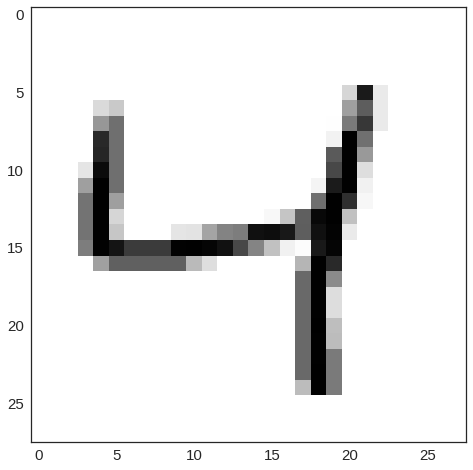

In [6]:

plt.imshow(digit);

In [7]:
def visualize_digit(model, digit):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    digit_batch = np.expand_dims(digit,axis=0)
    conv_digit = model.predict(digit_batch)
    conv_digit = np.squeeze(conv_digit, axis=0)
    print(conv_digit.shape)
    plt.imshow(conv_digit)

In [8]:
def plot_digit(digit):
    plt.imshow(digit, cmap='gray', interpolation='none');

(26, 26, 3)


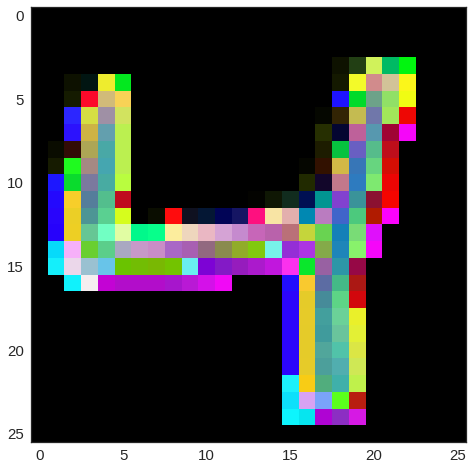

In [9]:
digit = digit.reshape(digit.shape[0], digit.shape[1], 1)

model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))

visualize_digit(model, digit)

(19, 19, 3)


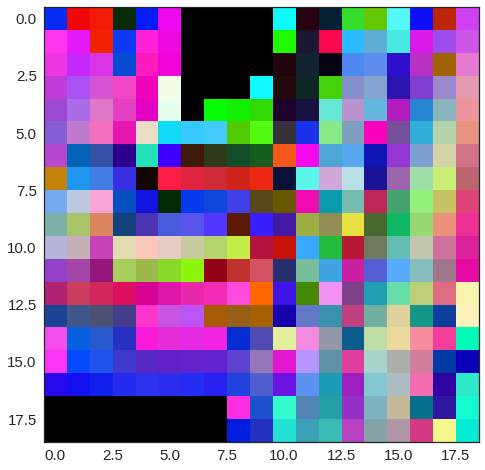

In [10]:
model = Sequential()
model.add(Conv2D(3, (10, 10), input_shape=digit.shape))

visualize_digit(model, digit)

In [11]:
def nice_digit_printer(model, digit):
    '''prints the digit as a 2d array'''
    digit_batch = np.expand_dims(digit,axis=0)
    conv_digit2 = model.predict(digit_batch)

    conv_digit2 = np.squeeze(conv_digit2, axis=0)
    print(conv_digit2.shape)
    conv_digit2 = conv_digit2.reshape(conv_digit2.shape[:2])

    print(conv_digit2.shape)
    plt.imshow(conv_digit2)

(26, 26, 1)
(26, 26)


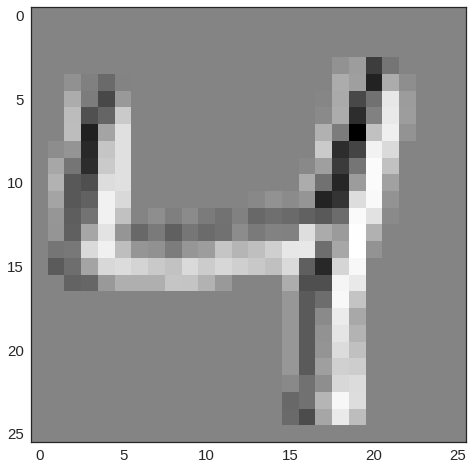

In [12]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=digit.shape))

nice_digit_printer(model, digit)

(17, 17, 1)
(17, 17)


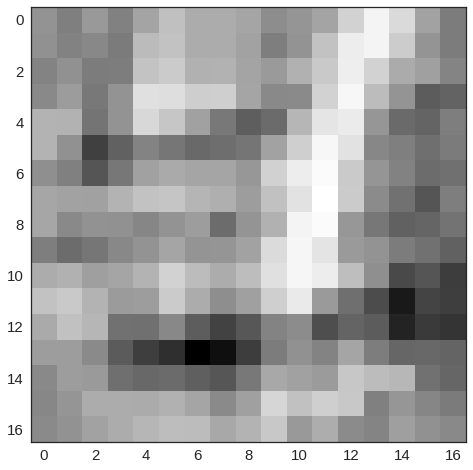

In [13]:
model = Sequential()
model.add(Conv2D(1, (12, 12), input_shape=digit.shape))

nice_digit_printer(model, digit)

(26, 26, 1)
(26, 26)


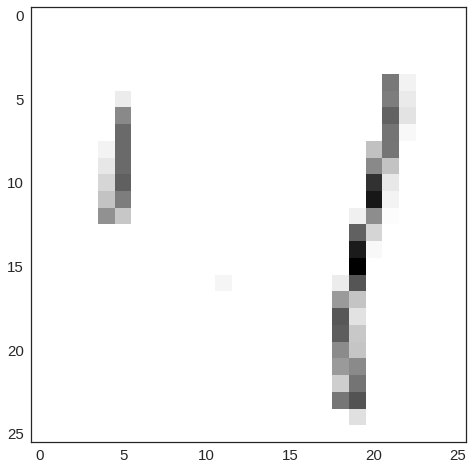

In [14]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=digit.shape))
model.add(Activation('relu'))

nice_digit_printer(model, digit)

(26, 26, 3)


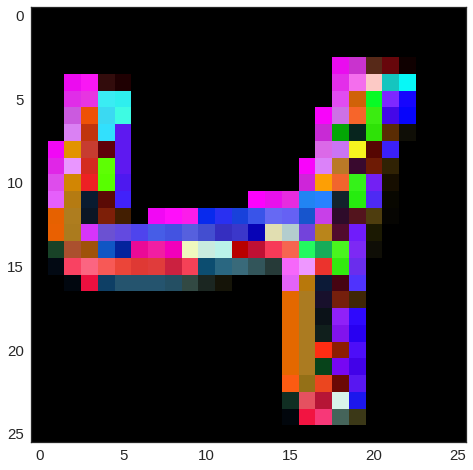

In [15]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))

visualize_digit(model, digit)

(26, 26, 3)


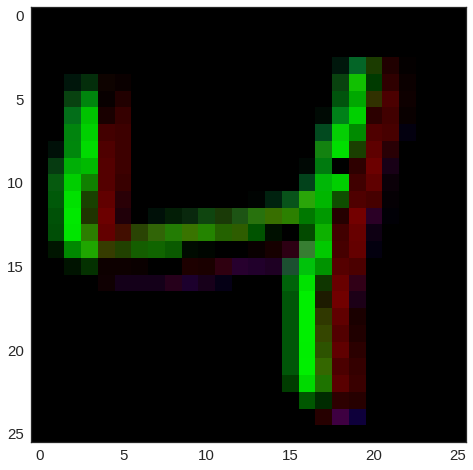

In [16]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))
model.add(Activation('relu'))

visualize_digit(model, digit)

# Max Pooling

(8, 8, 1)
(8, 8)


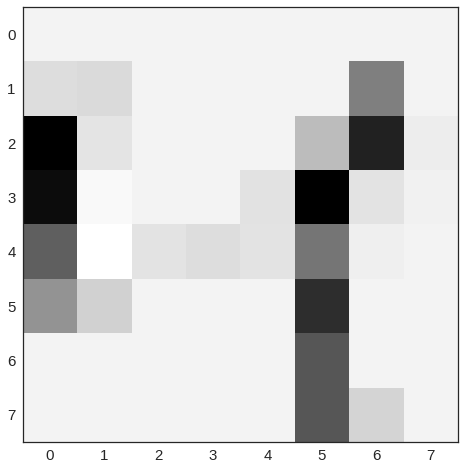

In [17]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=digit.shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

nice_digit_printer(model, digit)

(8, 8, 3)


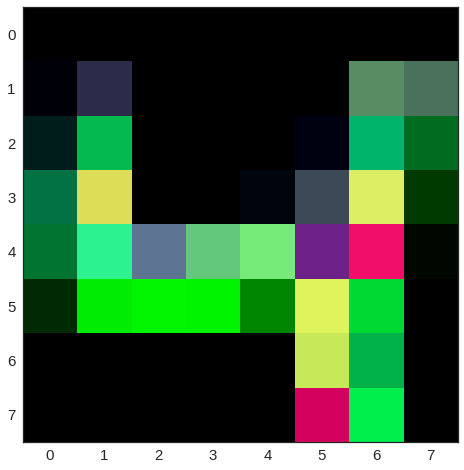

In [18]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))
model.add(MaxPooling2D(pool_size=(3, 3)))

visualize_digit(model, digit)

# Activation and Pooling

(8, 8, 1)
(8, 8)


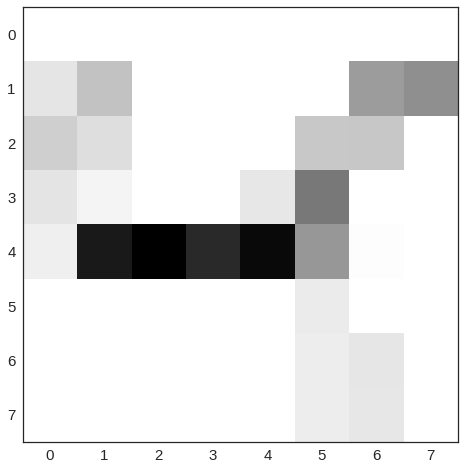

In [19]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=digit.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

nice_digit_printer(model, digit)

(8, 8, 3)


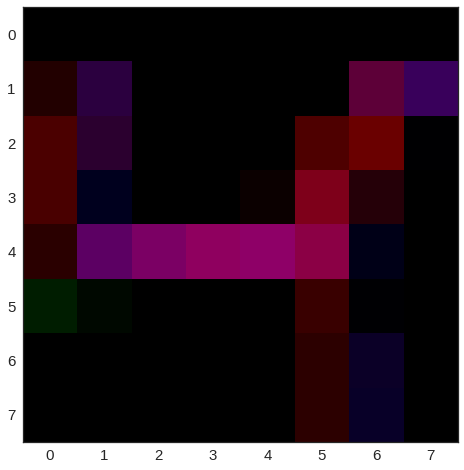

In [20]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=digit.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

visualize_digit(model, digit)

# Going deeper

(3, 3, 1)
(3, 3)


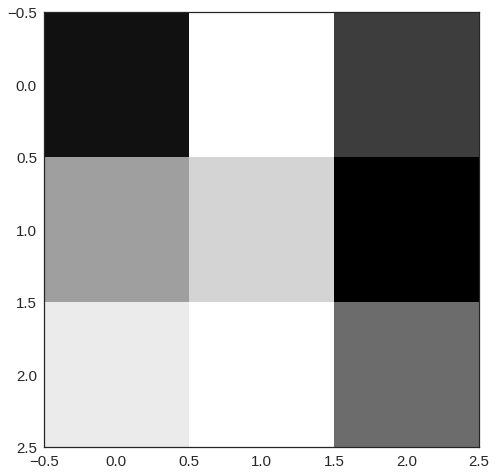

In [21]:

# 3 filters in conv1, then 1 filter for pretty printing
model = Sequential()
model.add(Conv2D(3,    # number of filter layers
                        (3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3),    # x dimension of kernel
                        input_shape=digit.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1,    # number of filter layers
                        (3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3),    # x dimension of kernel
                        input_shape=digit.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_digit_printer(model, digit)

In [22]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    return layer_dict[layer_name].output

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def visualize_layer(model, layer_name, digit):
    
    layer = get_output_layer(model, layer_name)
    
    input_img = model.input
    input_img_data = np.expand_dims(digit.copy().reshape(28, 28, 1), axis=0)

    kept_filters = []
    for filter_index in range(0, int(layer.shape[-1])):
        loss = K.mean(layer[:, :, :, filter_index])
        grads = K.gradients(loss, input_img)[0]

        iterate = K.function([input_img], [loss, grads])

        # step size for gradient ascent
        step = 1.

        # we run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step

#             print('Current loss value:', loss_value)
            if loss_value <= 0.:
                # some filters get stuck to 0, we can skip them
                break

        if loss_value > 0:
            img = deprocess_image(input_img_data[0])
            kept_filters.append((img, loss_value))
            
    n = 4

    # the filters that have the highest loss are assumed to be better-looking.
    # we will only keep the top 64 filters.
    kept_filters.sort(key=lambda x: x[1], reverse=True)
    kept_filters = kept_filters[:n * n]
    
    margin = 5
    width = n * img_cols + (n - 1) * margin
    height = n * img_rows + (n - 1) * margin
    stitched_filters = np.zeros((width, height, 1))
    
    
    for i in range(n):
        for j in range(n):
            img, loss = kept_filters[i * n + j]
            stitched_filters[(img_cols + margin) * i: (img_cols + margin) * i + img_cols,
                             (img_rows + margin) * j: (img_rows + margin) * j + img_rows, :] = img
            
    plt.imshow(stitched_filters.reshape(127, 127), cmap='gray', interpolation='none');

# Building a model

In [23]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [24]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name="conv_1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="max_pool_1"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='predictions'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

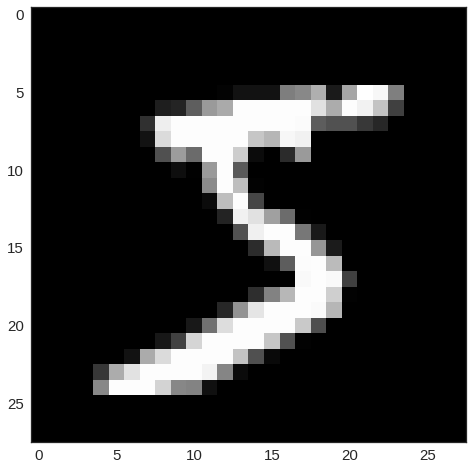

In [26]:
plot_digit(X_train[0].reshape(28, 28))

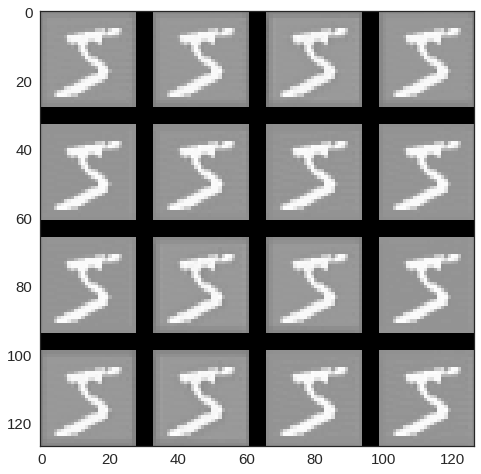

In [27]:
visualize_layer(model, "conv_1", X_train[0])

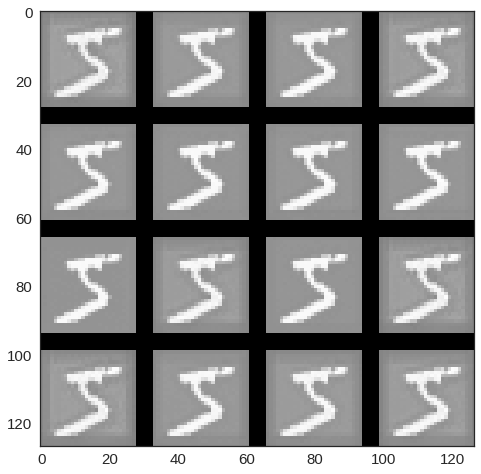

In [28]:
visualize_layer(model, "conv_2", X_train[0])

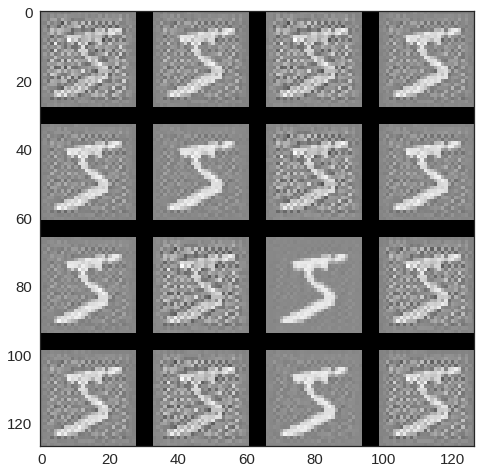

In [29]:
visualize_layer(model, "max_pool_1", X_train[0])

# Training

In [30]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test)).history
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s - loss: 0.3158 - acc: 0.9018 - val_loss: 0.0737 - val_acc: 0.9768
Epoch 2/12
60000/60000 [==============================] - 5s - loss: 0.1091 - acc: 0.9673 - val_loss: 0.0531 - val_acc: 0.9827
Epoch 3/12
60000/60000 [==============================] - 5s - loss: 0.0839 - acc: 0.9751 - val_loss: 0.0410 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 5s - loss: 0.0695 - acc: 0.9792 - val_loss: 0.0378 - val_acc: 0.9871
Epoch 5/12
60000/60000 [==============================] - 5s - loss: 0.0622 - acc: 0.9813 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 5s - loss: 0.0546 - acc: 0.9841 - val_loss: 0.0327 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 5s - loss: 0.0503 - acc: 0.9849 - val_loss: 0.0307 - val_acc: 0.9888
Epoch 8/12
60000/60000 [==============================] - 5s 

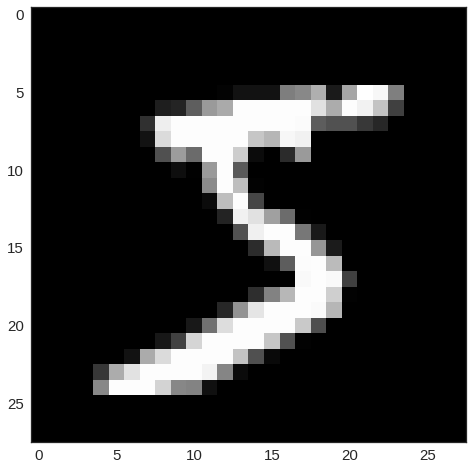

In [31]:
plot_digit(X_train[0].reshape(28, 28))

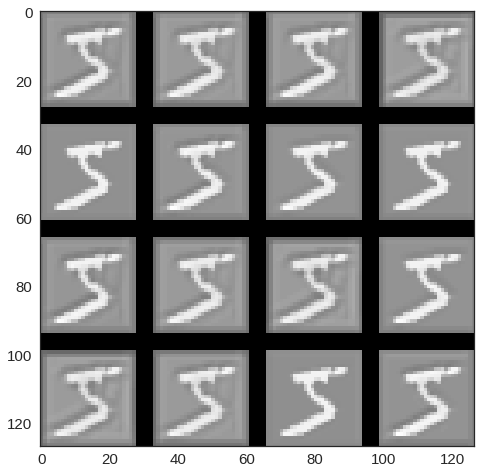

In [32]:
visualize_layer(model, "conv_1", X_train[0])

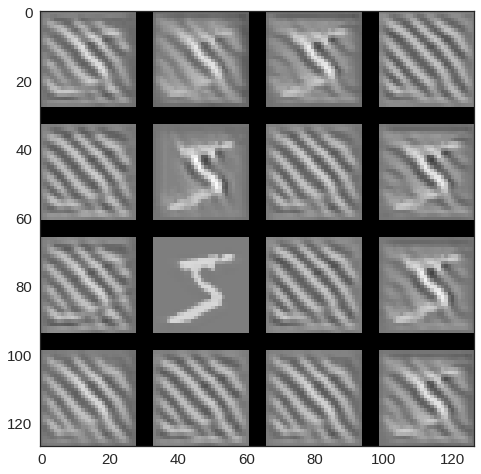

In [33]:
visualize_layer(model, "conv_2", X_train[0])

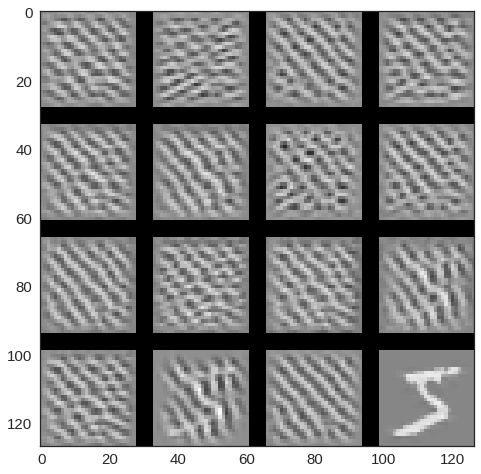

In [34]:
visualize_layer(model, "max_pool_1", X_train[0])

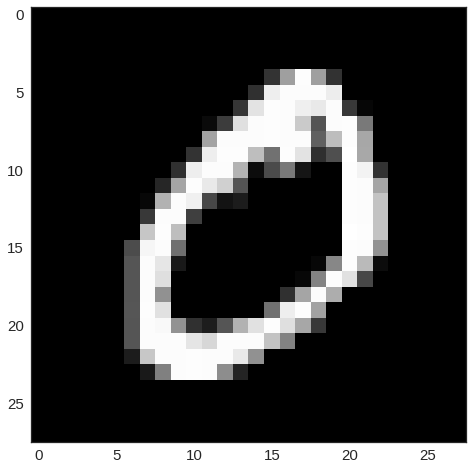

In [35]:
plot_digit(X_train[1].reshape(28, 28))

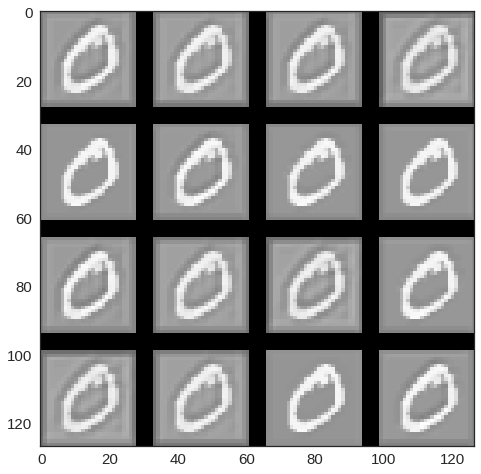

In [36]:
visualize_layer(model, "conv_1", X_train[1])

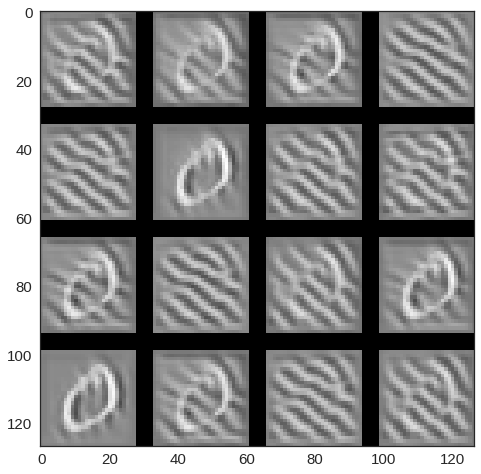

In [37]:
visualize_layer(model, "conv_2", X_train[1])

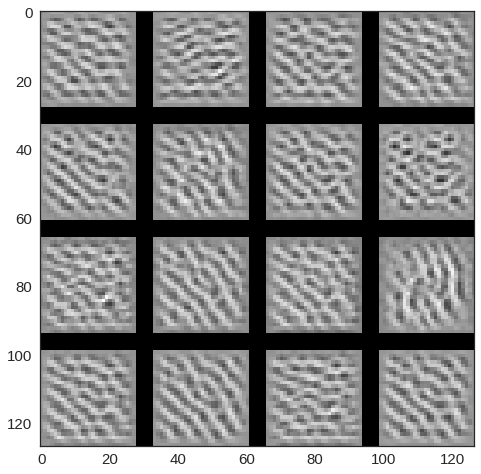

In [38]:
visualize_layer(model, "max_pool_1", X_train[1])

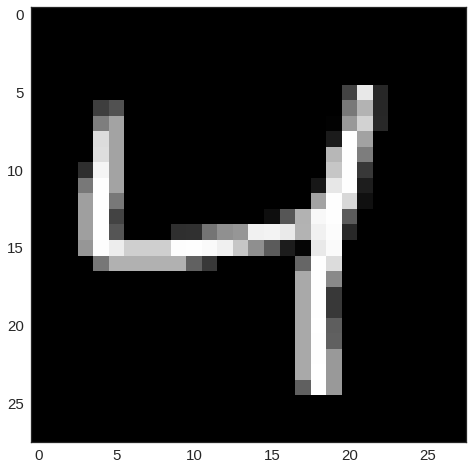

In [39]:
plot_digit(X_train[2].reshape(28, 28))

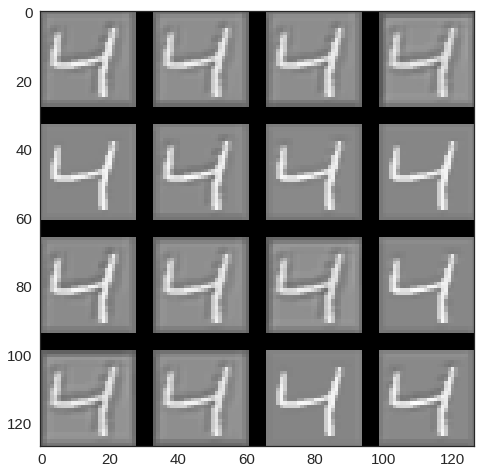

In [40]:
visualize_layer(model, "conv_1", X_train[2])

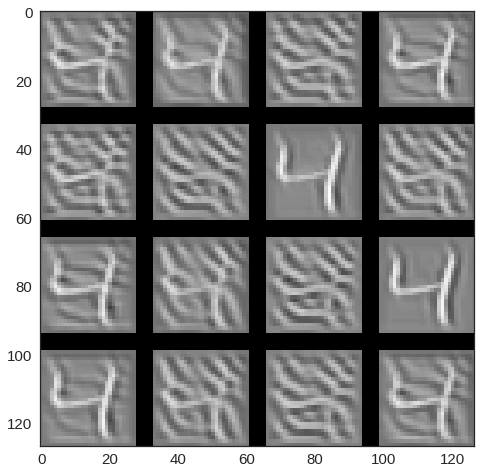

In [41]:
visualize_layer(model, "conv_2", X_train[2])

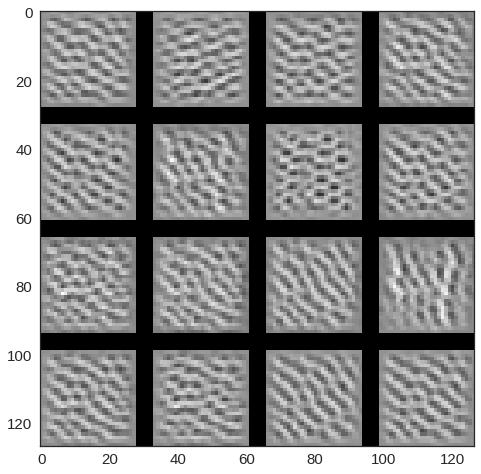

In [42]:
visualize_layer(model, "max_pool_1", X_train[2])

# Bias & Variance

![Bias-Variance Tradeoff](http://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

## High Variance

![High Variance](https://followthedata.files.wordpress.com/2012/06/screen-shot-2012-06-02-at-21-30-03.png)

We use the same model with really reduced dataset:

In [43]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name="conv_1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="max_pool_1"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='predictions'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train[:100], y_train[:100],
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(X_test, y_test)).history
predictions = model.predict(X_test)

Train on 100 samples, validate on 10000 samples
Epoch 1/30
100/100 [==============================] - 0s - loss: 2.3130 - acc: 0.0400 - val_loss: 2.2540 - val_acc: 0.2092
Epoch 2/30
100/100 [==============================] - 0s - loss: 2.2409 - acc: 0.2100 - val_loss: 2.1998 - val_acc: 0.2304
Epoch 3/30
100/100 [==============================] - 0s - loss: 2.1507 - acc: 0.2800 - val_loss: 2.1357 - val_acc: 0.3449
Epoch 4/30
100/100 [==============================] - 0s - loss: 2.0865 - acc: 0.3500 - val_loss: 2.0359 - val_acc: 0.4646
Epoch 5/30
100/100 [==============================] - 0s - loss: 1.9419 - acc: 0.4900 - val_loss: 1.9307 - val_acc: 0.5209
Epoch 6/30
100/100 [==============================] - 0s - loss: 1.7738 - acc: 0.6200 - val_loss: 1.7840 - val_acc: 0.5692
Epoch 7/30
100/100 [==============================] - 0s - loss: 1.5915 - acc: 0.6300 - val_loss: 1.6557 - val_acc: 0.5903
Epoch 8/30
100/100 [==============================] - 0s - loss: 1.3831 - acc: 0.6800 - val

In [44]:
def plot_training_history(history, true_class, y_pred):

    fig, ax = plt.subplots()
    ax.plot(history['loss'])
    ax.plot(history['val_loss'])
    ax.hlines(0.05, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Desired accuracy")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(ymin=0)
    plt.legend(['train', 'test'], loc='upper right', bbox_to_anchor=(1.20, 1), ncol=1);
    plt.show();
    
    fig, ax = plt.subplots()
    ax.plot(history['acc'])
    ax.plot(history['val_acc'])
    ax.hlines(0.99, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Desired accuracy")
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(ymin=0)
    plt.legend(['train', 'test', 'Desired accuracy'], loc='upper right', bbox_to_anchor=(1.20, 1), ncol=1);
    plt.show();
    
    conf_matrix = confusion_matrix(np.argmax(true_class, axis=1), np.argmax(y_pred, axis=1))
    
    fig, ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(conf_matrix, xticklabels=range(10), yticklabels=range(10), annot=True, fmt="d", ax=ax);
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show();

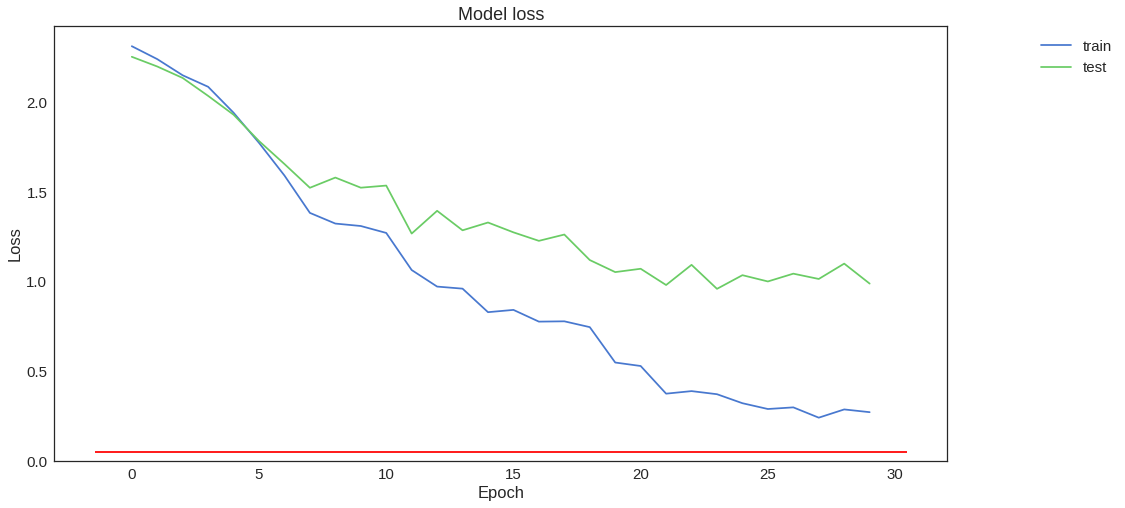

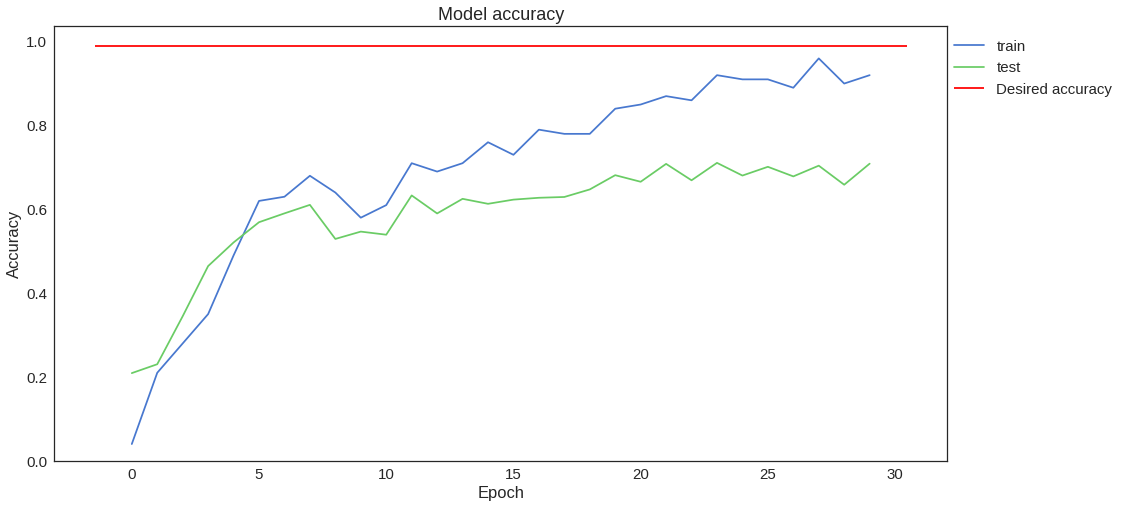

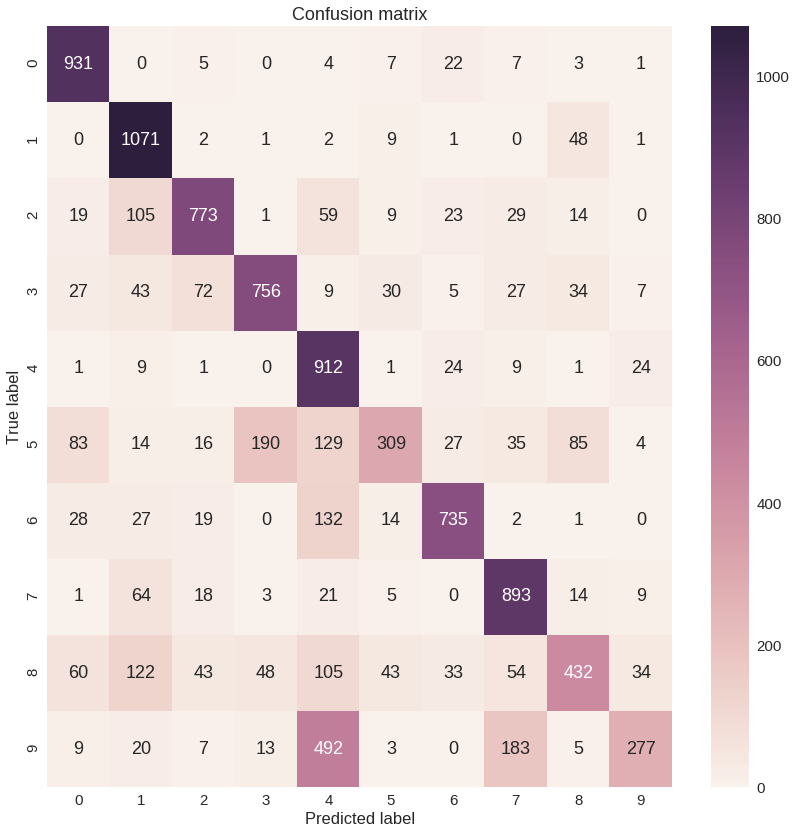

In [45]:
plot_training_history(history, y_test, predictions)

## High Bias

![High Bias](https://followthedata.files.wordpress.com/2012/06/screen-shot-2012-06-02-at-21-31-03.png)



In [46]:
X_train_mlp = X_train.reshape(60000, 784)
X_test_mlp = X_test.reshape(10000, 784)

model = Sequential()
model.add(Dense(1, input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax', name='predictions'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train_mlp, y_train, 
                    batch_size=batch_size, epochs=30, verbose=1, 
                    validation_data=(X_test_mlp, y_test)).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s - loss: 2.0047 - acc: 0.1873 - val_loss: 1.8570 - val_acc: 0.2342
Epoch 2/30
60000/60000 [==============================] - 1s - loss: 1.8069 - acc: 0.2425 - val_loss: 1.7725 - val_acc: 0.2554
Epoch 3/30
60000/60000 [==============================] - 1s - loss: 1.7482 - acc: 0.2669 - val_loss: 1.7316 - val_acc: 0.2804
Epoch 4/30
60000/60000 [==============================] - 1s - loss: 1.7119 - acc: 0.2948 - val_loss: 1.7004 - val_acc: 0.3106
Epoch 5/30
60000/60000 [==============================] - 1s - loss: 1.6844 - acc: 0.3023 - val_loss: 1.6766 - val_acc: 0.2987
Epoch 6/30
60000/60000 [==============================] - 1s - loss: 1.6622 - acc: 0.3010 - val_loss: 1.6572 - val_acc: 0.3053
Epoch 7/30
60000/60000 [==============================] - 1s - loss: 1.6437 - acc: 0.3124 - val_loss: 1.6414 - val_acc: 0.3071
Epoch 8/30
60000/60000 [==============================] - 1s 

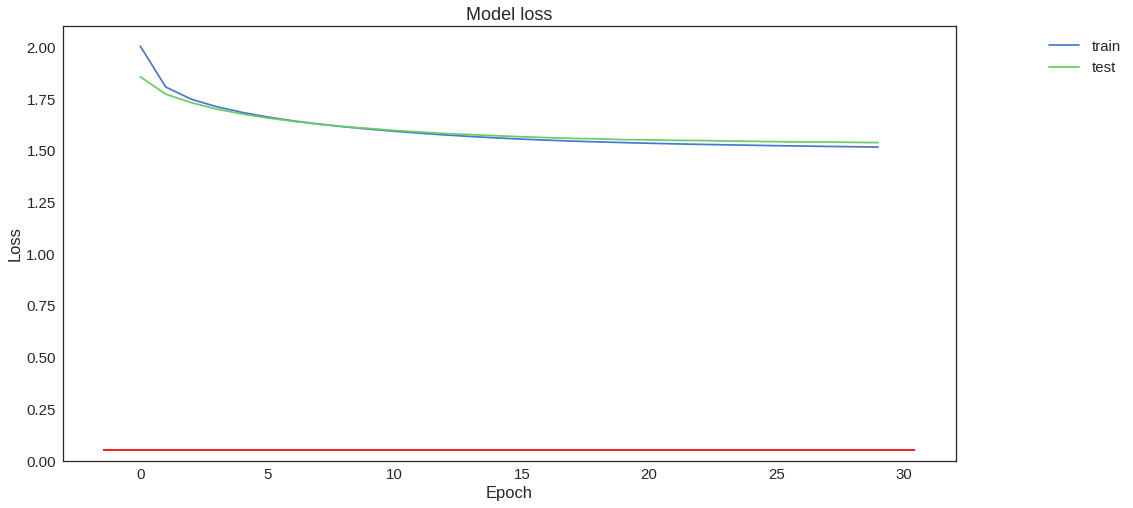

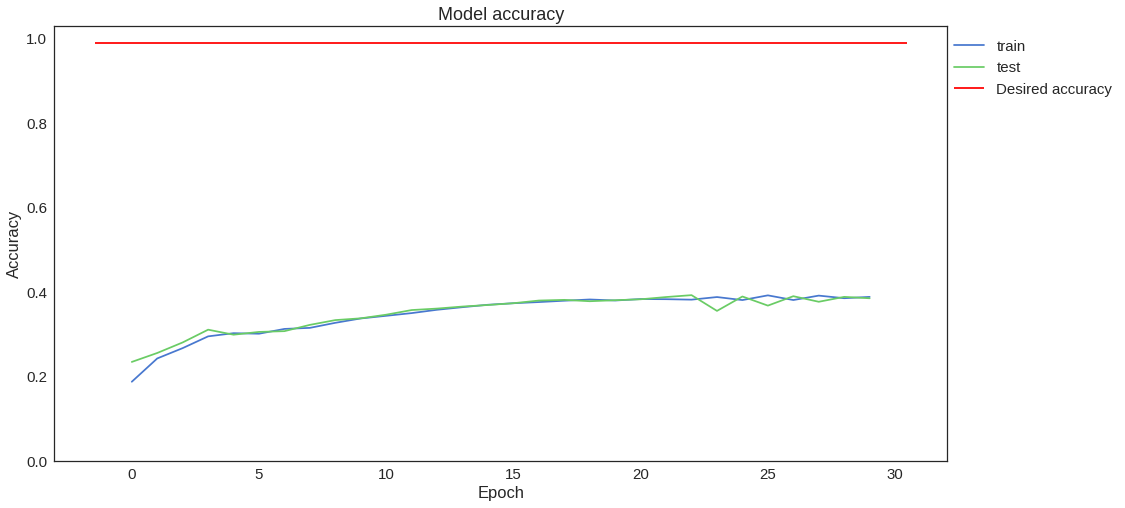

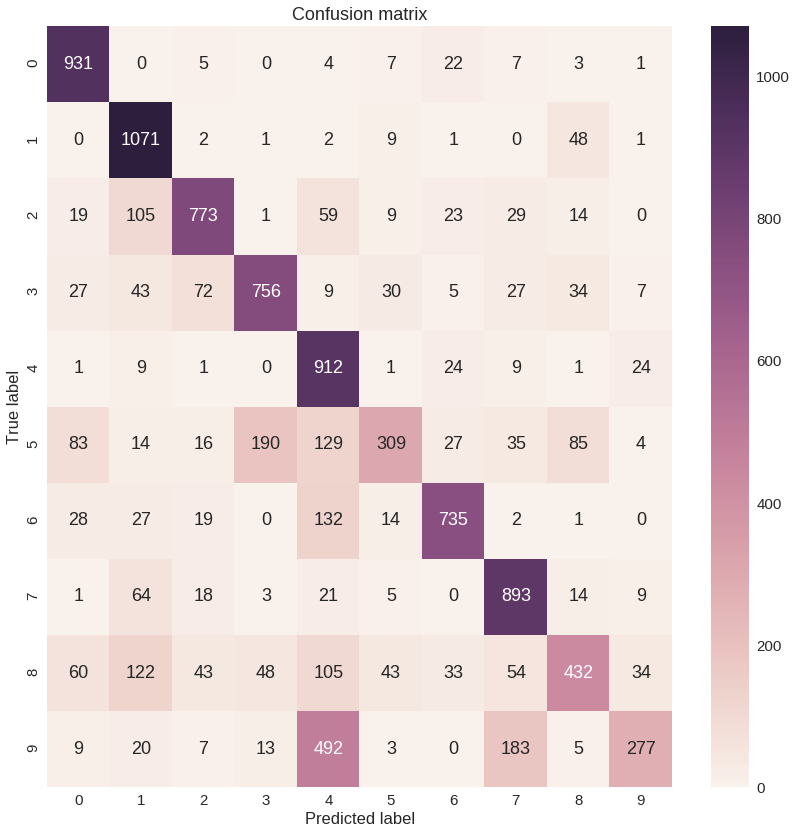

In [47]:
plot_training_history(history, y_test, predictions)

## Over and under fitting

![Over & Under fitting](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

> At its root, dealing with bias and variance is really about dealing with over- and under-fitting. Bias is reduced and variance is increased in relation to model complexity. As more and more parameters are added to a model, the complexity of the model rises and variance becomes our primary concern while bias steadily falls. - **Scott Fortmann-Roe**

# Hyperparameter optimization

In [48]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [57]:
def create_model(n_neurons, activation):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape=(784,), activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

In [67]:
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=batch_size, verbose=0)

n_neurons = [10, 20, 30]
activation = ['relu', 'tanh']
param_grid = dict(n_neurons=n_neurons, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_result = grid.fit(X_train_mlp, y_train)

In [68]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.916817 using {'activation': 'relu', 'n_neurons': 30}
0.895083 (0.001383) with: {'activation': 'relu', 'n_neurons': 10}
0.910700 (0.001300) with: {'activation': 'relu', 'n_neurons': 20}
0.916817 (0.001150) with: {'activation': 'relu', 'n_neurons': 30}
0.881800 (0.002367) with: {'activation': 'tanh', 'n_neurons': 10}
0.907950 (0.000717) with: {'activation': 'tanh', 'n_neurons': 20}
0.916083 (0.000383) with: {'activation': 'tanh', 'n_neurons': 30}
